In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Overview

In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/PBI - Home Credit Indonesia/Dataset/application_train.csv")

In [4]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah kolom: {jumlah_kolom}")
print(f"Jumlah baris: {jumlah_baris}")

Jumlah kolom: 122
Jumlah baris: 307511


In [6]:
#describe numerical
df.describe().round(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,3.075110e+05,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,...,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,1.687979e+05,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,...,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,2.371231e+05,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,...,0.09,0.02,0.02,0.02,0.08,0.11,0.20,0.92,0.79,1.87
min,100002.00,0.00,0.00,2.565000e+04,45000.00,1615.50,40500.00,0.00,-25229.00,-17912.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,189145.50,0.00,0.00,1.125000e+05,270000.00,16524.00,238500.00,0.01,-19682.00,-2760.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,278202.00,0.00,0.00,1.471500e+05,513531.00,24903.00,450000.00,0.02,-15750.00,-1213.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,367142.50,0.00,1.00,2.025000e+05,808650.00,34596.00,679500.00,0.03,-12413.00,-289.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
max,456255.00,1.00,19.00,1.170000e+08,4050000.00,258025.50,4050000.00,0.07,-7489.00,365243.00,...,1.00,1.00,1.00,1.00,4.00,9.00,8.00,27.00,261.00,25.00


In [7]:
#describe categorical
df.describe(include='object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


## Data Cleaning

### Handling Duplicate Values

In [8]:
df.duplicated().sum()

0

### Handling Missing Values

In [9]:
# Jumlah missing values
null_counts = df.isnull().sum()

# Presentase missing values
null_percent = ((null_counts/len(df)*100)).round(2)

# dataframe untuk missing values
df_null = pd.DataFrame({'total_null':null_counts, 'percentage_null':null_percent})
df_null.sort_values('percentage_null', ascending=False, inplace=True)

df_null.reset_index()

,index,total_null,percentage_null
0,COMMONAREA_MEDI,214865,69.87
1,COMMONAREA_AVG,214865,69.87
2,COMMONAREA_MODE,214865,69.87
3,NONLIVINGAPARTMENTS_MODE,213514,69.43
4,NONLIVINGAPARTMENTS_AVG,213514,69.43
...,...,...,...
117,NAME_FAMILY_STATUS,0,0.00
118,NAME_EDUCATION_TYPE,0,0.00
119,NAME_INCOME_TYPE,0,0.00
120,AMT_ANNUITY,12,0.00


In [10]:
# Memfilter kolom yang akan dihapus
columns_to_drop = df_null[df_null['percentage_null'] > 50].index

# Menghapus kolom-kolom dengan missing values lebih dari 50%
df.drop(columns=columns_to_drop, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [12]:
# Membagi dataset menjadi numerical & categorical
numericals = df.select_dtypes(exclude = 'object')
categoricals = df.select_dtypes(include = 'object')

In [13]:
# Mengisi nilai null dengan median pada kolom numerical
for i in numericals:
    df[i] = df[i].fillna(df[i].median())

# Mengisi nilai null dengan mode pada kolom categorical
for i in categoricals:
    df[i] = df[i].fillna(df[i].mode().iloc[0])

In [14]:
# Cek apakah ada missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

## Exploratory Data Analysis (EDA)

In [15]:
df['TARGET_DIFFICULTY'] = df['TARGET'].apply(lambda x: 'No payment difficulty' if x == 0 else 'Payment difficulty')
target_diff = df.groupby('TARGET_DIFFICULTY').agg(COUNT =('TARGET_DIFFICULTY','count')).reset_index()

target_diff.rename(columns={'index':'Difficulty'},inplace=True)
target_diff

,TARGET_DIFFICULTY,COUNT
0,No payment difficulty,282686
1,Payment difficulty,24825


Text(0.5, 1.0, 'Clients Repayment Abilities')

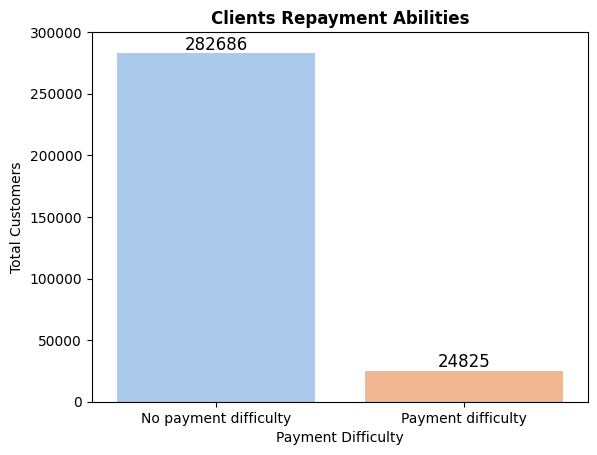

In [65]:
sns.barplot(x='TARGET_DIFFICULTY', y='COUNT', data=target_diff, palette='pastel', label='Payment Difficulty')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

#set ylim
plt.ylim (0,300000)

#add label axis
plt.xlabel('Payment Difficulty')
plt.ylabel('Total Customers')

#add title
plt.title('Clients Repayment Abilities',fontsize=12, fontweight ='bold')

In [17]:
#groupby gender per customer
df_gender = df.groupby(['CODE_GENDER','TARGET_DIFFICULTY']).agg(TOTAL_CUST=('SK_ID_CURR','count')).reset_index().sort_values('TOTAL_CUST', ascending=False)
df_gender

,CODE_GENDER,TARGET_DIFFICULTY,TOTAL_CUST
0,F,No payment difficulty,188278
2,M,No payment difficulty,94404
1,F,Payment difficulty,14170
3,M,Payment difficulty,10655
4,XNA,No payment difficulty,4


In [18]:
# Mengganti nilai 'XNA' menjadi modus dari kolom 'CODE_GENDER'
mode_gender = df['CODE_GENDER'].mode().iloc[0]
df['CODE_GENDER'] = df['CODE_GENDER'].replace('XNA', mode_gender)

In [19]:
df_gender = df.groupby(['CODE_GENDER','TARGET_DIFFICULTY']).agg(TOTAL_CUST=('SK_ID_CURR','count')).reset_index().sort_values('TOTAL_CUST', ascending=False)
df_gender['CODE_GENDER'] = df_gender['CODE_GENDER'].apply(lambda x: 'Female' if x == 'F' else 'Male')
df_gender

,CODE_GENDER,TARGET_DIFFICULTY,TOTAL_CUST
0,Female,No payment difficulty,188282
2,Male,No payment difficulty,94404
1,Female,Payment difficulty,14170
3,Male,Payment difficulty,10655


Text(0.5, 1.0, 'Customer Repayment Abilities by Gender')

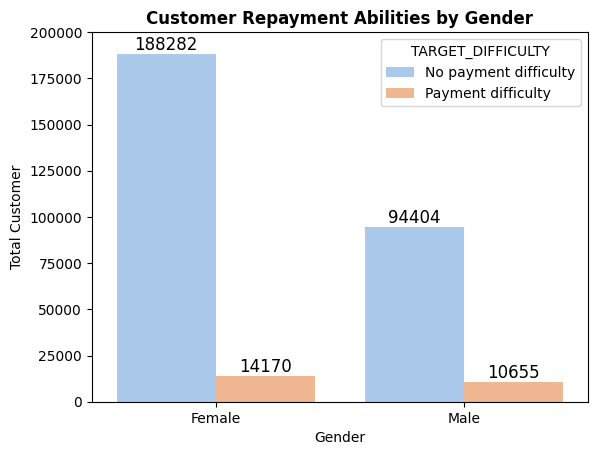

In [67]:
sns.barplot(x='CODE_GENDER', y='TOTAL_CUST', hue='TARGET_DIFFICULTY', data=df_gender, palette='pastel')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

#set ylim
plt.ylim (0,200000)

#add label axis
plt.xlabel('Gender')
plt.ylabel('Total Customer')

#add title
plt.title('Customer Repayment Abilities by Gender',fontsize=12, fontweight ='bold')

In [21]:
#groupby
df_contract = df.groupby(['NAME_CONTRACT_TYPE','TARGET_DIFFICULTY']).agg(TOTAL_CUST=('SK_ID_CURR','count')).reset_index().sort_values('TOTAL_CUST', ascending=False)
df_contract

,NAME_CONTRACT_TYPE,TARGET_DIFFICULTY,TOTAL_CUST
0,Cash loans,No payment difficulty,255011
2,Revolving loans,No payment difficulty,27675
1,Cash loans,Payment difficulty,23221
3,Revolving loans,Payment difficulty,1604


Text(0.5, 1.0, 'Customer Repayment Abilities by Contract Type')

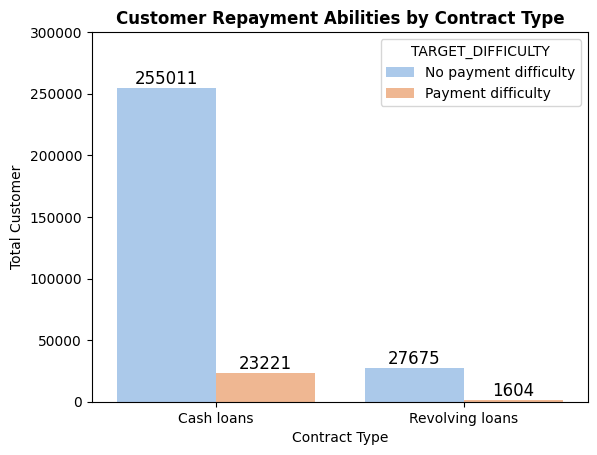

In [68]:
sns.barplot(x='NAME_CONTRACT_TYPE', y='TOTAL_CUST', hue='TARGET_DIFFICULTY', data=df_contract, palette='pastel')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

#set ylim
plt.ylim (0,300000)

#add label axis
plt.xlabel('Contract Type')
plt.ylabel('Total Customer')

#add title
plt.title('Customer Repayment Abilities by Contract Type',fontsize=12, fontweight ='bold')

In [23]:
#groupby
df_income_type = df.groupby(['NAME_INCOME_TYPE','TARGET_DIFFICULTY']).agg(TOTAL_CUST=('SK_ID_CURR','count')).reset_index().sort_values('TOTAL_CUST', ascending=False)
df_income_type

,NAME_INCOME_TYPE,TARGET_DIFFICULTY,TOTAL_CUST
12,Working,No payment difficulty,143550
1,Commercial associate,No payment difficulty,66257
5,Pensioner,No payment difficulty,52380
7,State servant,No payment difficulty,20454
13,Working,Payment difficulty,15224
2,Commercial associate,Payment difficulty,5360
6,Pensioner,Payment difficulty,2982
8,State servant,Payment difficulty,1249
9,Student,No payment difficulty,18
10,Unemployed,No payment difficulty,14


Text(0.5, 1.0, 'Customer Repayment Abilities by Income Type')

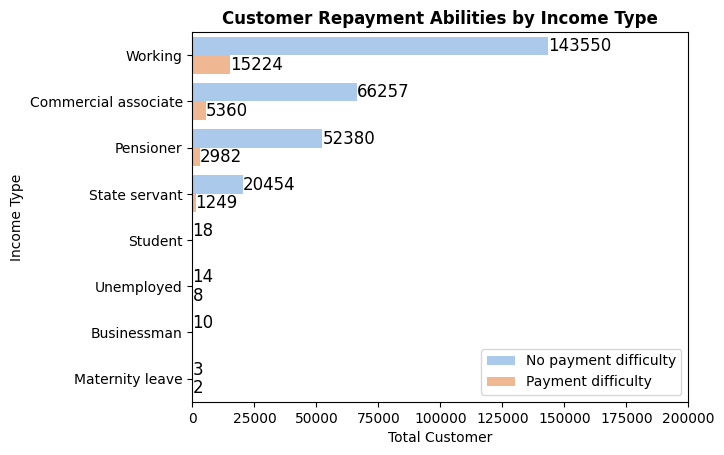

In [69]:
sns.barplot( y='NAME_INCOME_TYPE', x='TOTAL_CUST', hue='TARGET_DIFFICULTY', data=df_income_type, palette='pastel')

# Menambahkan teks di samping bar
ax = plt.gca()
for p in ax.patches:
    value = p.get_width()
    if not math.isnan(value):
        ax.text(value + 1, p.get_y() + p.get_height() / 2., '%d' % int(value),
                fontsize=12, color='black', ha='left', va='center')

#set ylim
plt.xlim (0,200000)

#add label axis
plt.xlabel('Total Customer')
plt.ylabel('Income Type')

#legend
plt.legend(loc='lower right')

#add title
plt.title('Customer Repayment Abilities by Income Type',fontsize=12, fontweight ='bold')

In [25]:
#groupby
df_suite = df.groupby(['NAME_TYPE_SUITE','TARGET_DIFFICULTY']).agg(TOTAL_CUST=('SK_ID_CURR','count')).reset_index().sort_values('TOTAL_CUST', ascending=False)
df_suite

,NAME_TYPE_SUITE,TARGET_DIFFICULTY,TOTAL_CUST
12,Unaccompanied,No payment difficulty,229411
2,Family,No payment difficulty,37140
13,Unaccompanied,Payment difficulty,20407
10,"Spouse, partner",No payment difficulty,10475
0,Children,No payment difficulty,3026
3,Family,Payment difficulty,3009
8,Other_B,No payment difficulty,1596
11,"Spouse, partner",Payment difficulty,895
6,Other_A,No payment difficulty,790
4,Group of people,No payment difficulty,248


Text(0.5, 1.0, 'Customer Repayment Abilities by Suite Type')

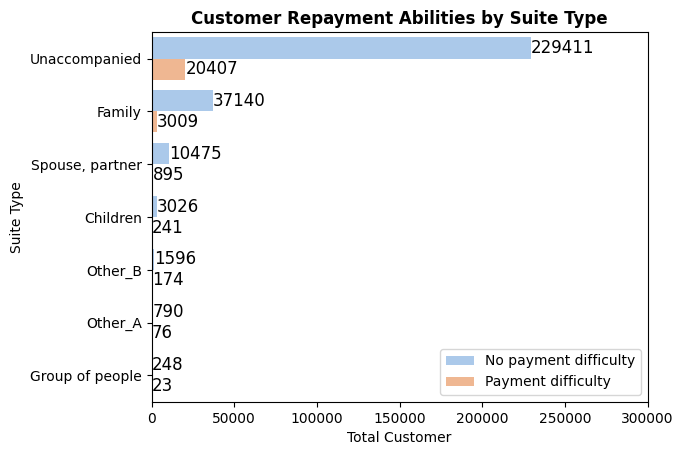

In [70]:
sns.barplot(y='NAME_TYPE_SUITE', x='TOTAL_CUST', hue='TARGET_DIFFICULTY', data=df_suite, palette='pastel')

# Menambahkan teks di samping bar
ax = plt.gca()
for p in ax.patches:
    value = p.get_width()
    if not math.isnan(value):
        ax.text(value + 1, p.get_y() + p.get_height() / 2., '%d' % int(value),
                fontsize=12, color='black', ha='left', va='center')

#set ylim
plt.xlim (0,300000)

#add label axis
plt.xlabel('Total Customer')
plt.ylabel('Suite Type')

#legend
plt.legend(loc='lower right')

#add title
plt.title('Customer Repayment Abilities by Suite Type',fontsize=12, fontweight ='bold')

In [27]:
#groupby
df_edu = df.groupby(['NAME_EDUCATION_TYPE','TARGET_DIFFICULTY']).agg(TOTAL_CUST=('SK_ID_CURR','count')).reset_index().sort_values('TOTAL_CUST', ascending=False)
df_edu

,NAME_EDUCATION_TYPE,TARGET_DIFFICULTY,TOTAL_CUST
8,Secondary / secondary special,No payment difficulty,198867
2,Higher education,No payment difficulty,70854
9,Secondary / secondary special,Payment difficulty,19524
4,Incomplete higher,No payment difficulty,9405
3,Higher education,Payment difficulty,4009
6,Lower secondary,No payment difficulty,3399
5,Incomplete higher,Payment difficulty,872
7,Lower secondary,Payment difficulty,417
0,Academic degree,No payment difficulty,161
1,Academic degree,Payment difficulty,3


Text(0.5, 1.0, 'Customer Repayment Abilities by Education Type')

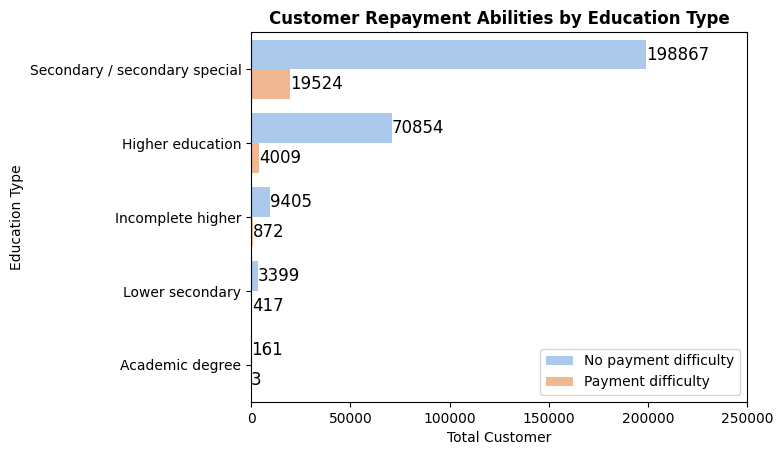

In [71]:
sns.barplot(y='NAME_EDUCATION_TYPE', x='TOTAL_CUST', hue='TARGET_DIFFICULTY', data=df_edu, palette='pastel')

# Menambahkan teks di samping bar
ax = plt.gca()
for p in ax.patches:
    value = p.get_width()
    if not math.isnan(value):
        ax.text(value + 1, p.get_y() + p.get_height() / 2., '%d' % int(value),
                fontsize=12, color='black', ha='left', va='center')

#set ylim
plt.xlim (0,250000)

#add label axis
plt.xlabel('Total Customer')
plt.ylabel('Education Type')

#legend
plt.legend(loc='lower right')

#add title
plt.title('Customer Repayment Abilities by Education Type',fontsize=12, fontweight ='bold')

In [29]:
#groupby
df_family = df.groupby(['NAME_FAMILY_STATUS','TARGET_DIFFICULTY']).agg(TOTAL_CUST=('SK_ID_CURR','count')).reset_index().sort_values('TOTAL_CUST', ascending=False)
df_family

,NAME_FAMILY_STATUS,TARGET_DIFFICULTY,TOTAL_CUST
2,Married,No payment difficulty,181582
6,Single / not married,No payment difficulty,40987
0,Civil marriage,No payment difficulty,26814
4,Separated,No payment difficulty,18150
9,Widow,No payment difficulty,15151
3,Married,Payment difficulty,14850
7,Single / not married,Payment difficulty,4457
1,Civil marriage,Payment difficulty,2961
5,Separated,Payment difficulty,1620
10,Widow,Payment difficulty,937


Text(0.5, 1.0, 'Customer Repayment Abilities by Family Status')

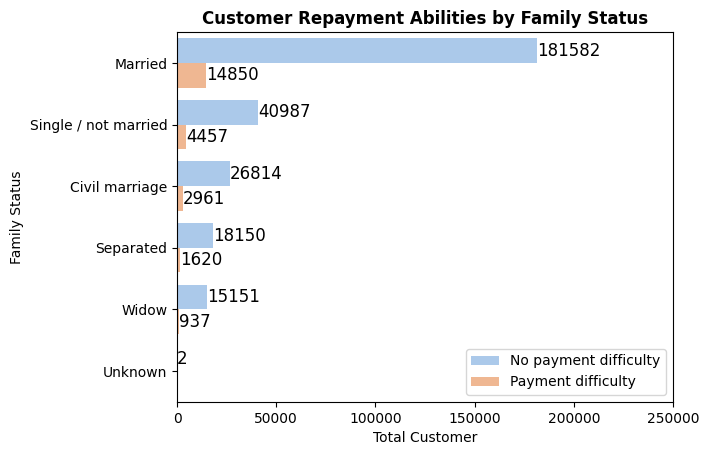

In [72]:
sns.barplot(y='NAME_FAMILY_STATUS', x='TOTAL_CUST', hue='TARGET_DIFFICULTY', data=df_family, palette='pastel')

# Menambahkan teks di samping bar
ax = plt.gca()
for p in ax.patches:
    value = p.get_width()
    if not math.isnan(value):
        ax.text(value + 1, p.get_y() + p.get_height() / 2., '%d' % int(value),
                fontsize=12, color='black', ha='left', va='center')

#set ylim
plt.xlim (0,250000)

#add label axis
plt.xlabel('Total Customer')
plt.ylabel('Family Status')

#legend
plt.legend(loc='lower right')

#add title
plt.title('Customer Repayment Abilities by Family Status',fontsize=12, fontweight ='bold')

In [31]:
#groupby
df_housing = df.groupby(['NAME_HOUSING_TYPE','TARGET_DIFFICULTY']).agg(TOTAL_CUST=('SK_ID_CURR','count')).reset_index().sort_values('TOTAL_CUST', ascending=False)
df_housing

,NAME_HOUSING_TYPE,TARGET_DIFFICULTY,TOTAL_CUST
2,House / apartment,No payment difficulty,251596
3,House / apartment,Payment difficulty,21272
10,With parents,No payment difficulty,13104
4,Municipal apartment,No payment difficulty,10228
8,Rented apartment,No payment difficulty,4280
6,Office apartment,No payment difficulty,2445
11,With parents,Payment difficulty,1736
0,Co-op apartment,No payment difficulty,1033
5,Municipal apartment,Payment difficulty,955
9,Rented apartment,Payment difficulty,601


Text(0.5, 1.0, 'Customer Repayment Abilities by Housing Type')

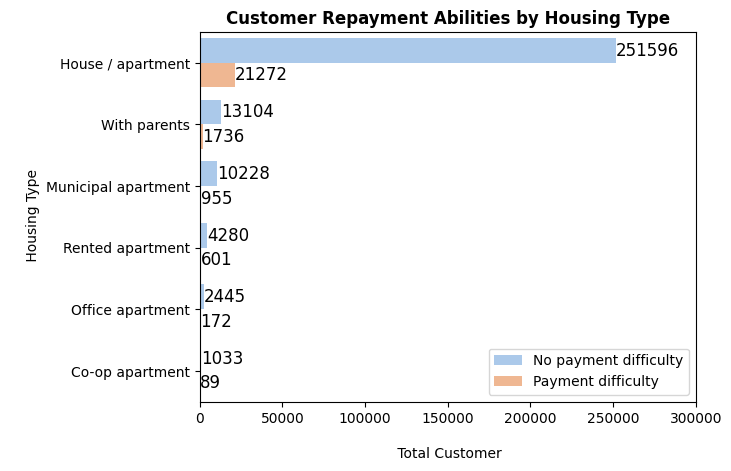

In [73]:
sns.barplot(y='NAME_HOUSING_TYPE', x='TOTAL_CUST', hue='TARGET_DIFFICULTY', data=df_housing, palette='pastel')

# Menambahkan teks di samping bar
ax = plt.gca()
for p in ax.patches:
    value = p.get_width()
    if not math.isnan(value):
        ax.text(value + 1, p.get_y() + p.get_height() / 2., '%d' % int(value),
                fontsize=12, color='black', ha='left', va='center')

#set ylim
plt.xlim (0,300000)

#add label axis
plt.xlabel('\n Total Customer')
plt.ylabel('\n Housing Type')

#legend
plt.legend(loc='lower right')

#add title
plt.title('Customer Repayment Abilities by Housing Type',fontsize=12, fontweight ='bold')

In [33]:
#groupby
df_car = df.groupby(['FLAG_OWN_CAR','TARGET_DIFFICULTY']).agg(TOTAL_CUST=('SK_ID_CURR','count')).reset_index().sort_values('TOTAL_CUST', ascending=False)
df_car['FLAG_OWN_CAR'] = df_car['FLAG_OWN_CAR'].apply(lambda x: 'Have Car' if x == 'Y' else 'Don\'t have car')
df_car

,FLAG_OWN_CAR,TARGET_DIFFICULTY,TOTAL_CUST
0,Don't have car,No payment difficulty,185675
2,Have Car,No payment difficulty,97011
1,Don't have car,Payment difficulty,17249
3,Have Car,Payment difficulty,7576


Text(0.5, 1.0, 'Customer Repayment Abilities by Car Owning')

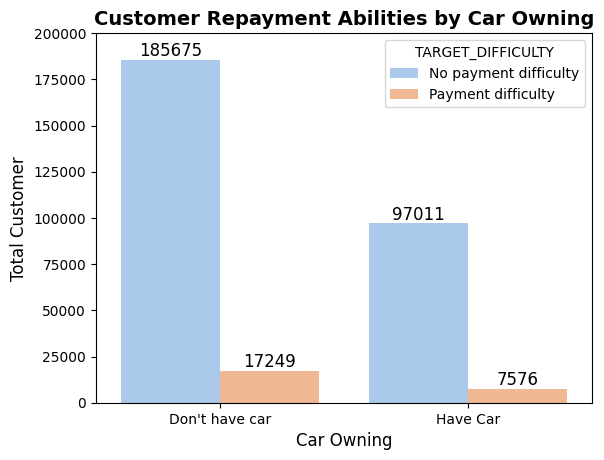

In [74]:
sns.barplot(x='FLAG_OWN_CAR', y='TOTAL_CUST', hue='TARGET_DIFFICULTY', data=df_car, palette='pastel')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

#set ylim
plt.ylim (0,200000)

#add label axis
plt.xlabel('Car Owning',fontsize=12)
plt.ylabel('Total Customer',fontsize=12)

#add title
plt.title('Customer Repayment Abilities by Car Owning',fontsize=14, fontweight ='bold')

In [35]:
#groupby
df_occupation = df.groupby(['OCCUPATION_TYPE','TARGET_DIFFICULTY']).agg(TOTAL_CUST=('SK_ID_CURR','count')).reset_index().sort_values('TOTAL_CUST', ascending=False)
df_occupation

,OCCUPATION_TYPE,TARGET_DIFFICULTY,TOTAL_CUST
16,Laborers,No payment difficulty,139461
28,Sales staff,No payment difficulty,29010
6,Core staff,No payment difficulty,25832
20,Managers,No payment difficulty,20043
8,Drivers,No payment difficulty,16496
17,Laborers,Payment difficulty,12116
12,High skill tech staff,No payment difficulty,10679
0,Accountants,No payment difficulty,9339
22,Medicine staff,No payment difficulty,7965
32,Security staff,No payment difficulty,5999


Text(0.5, 1.0, 'Customer Repayment Abilities by Occupation Type')

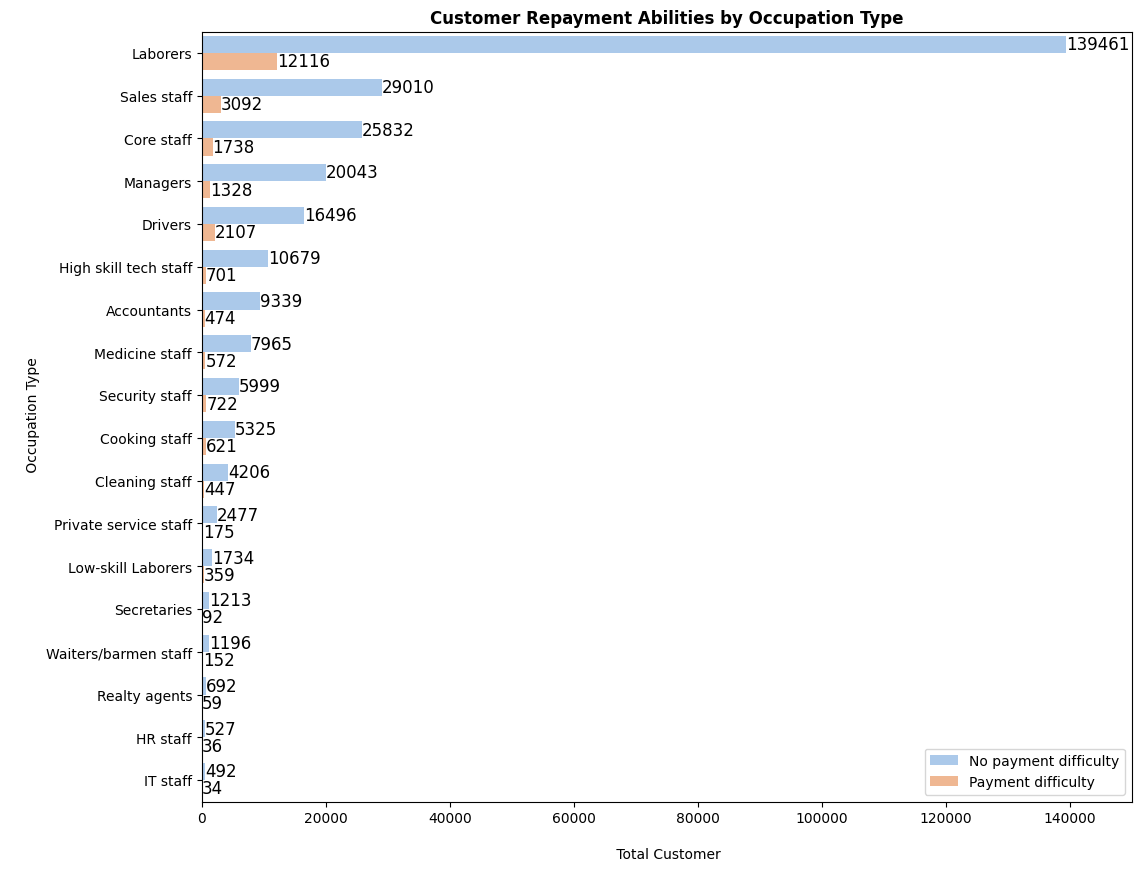

In [36]:
plt.figure(figsize=(12,10))
sns.barplot(y='OCCUPATION_TYPE', x='TOTAL_CUST', hue='TARGET_DIFFICULTY', data=df_occupation, palette='pastel')

# Menambahkan teks di samping bar
ax = plt.gca()
for p in ax.patches:
    value = p.get_width()
    if not math.isnan(value):
        ax.text(value + 1, p.get_y() + p.get_height() / 2., '%d' % int(value),
                fontsize=12, color='black', ha='left', va='center')

#set ylim
plt.xlim (0,150000)

#add label axis
plt.xlabel('\n Total Customer')
plt.ylabel('\n Occupation Type')

#legend
plt.legend(loc='lower right')

#add title
plt.title('Customer Repayment Abilities by Occupation Type',fontsize=12, fontweight ='bold')

## Detecting Outliers

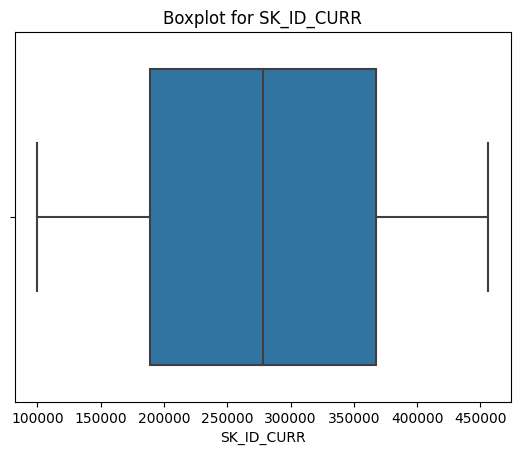

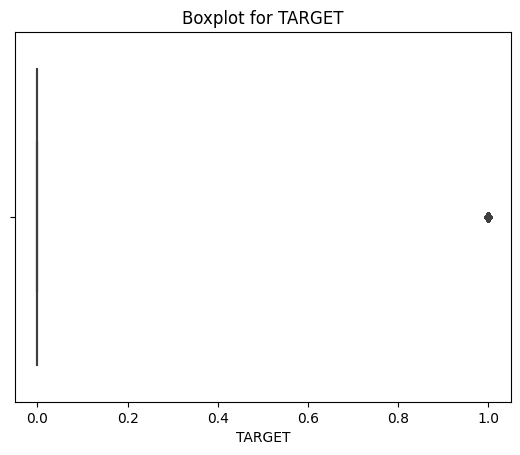

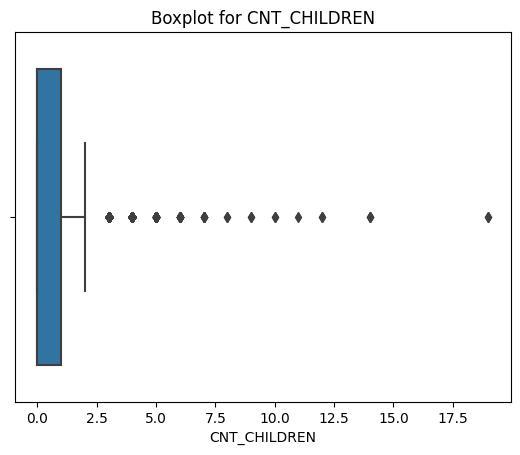

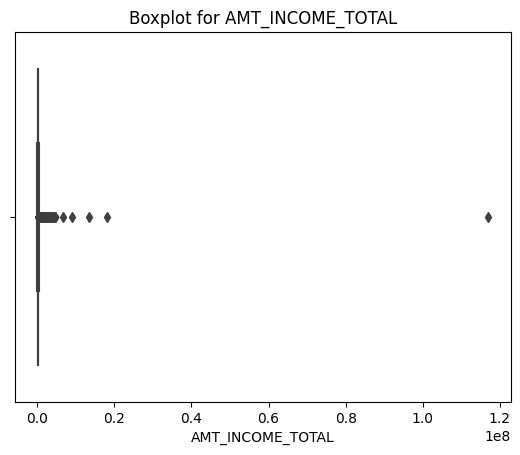

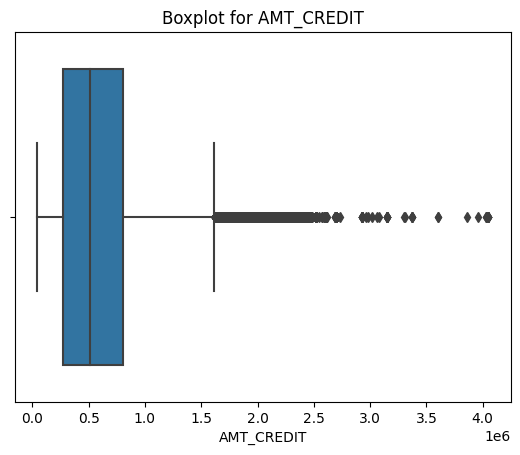

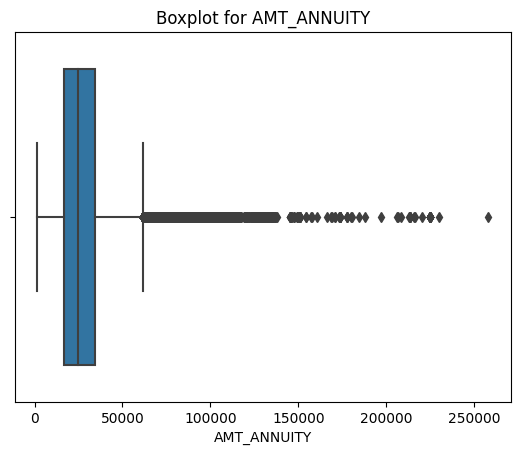

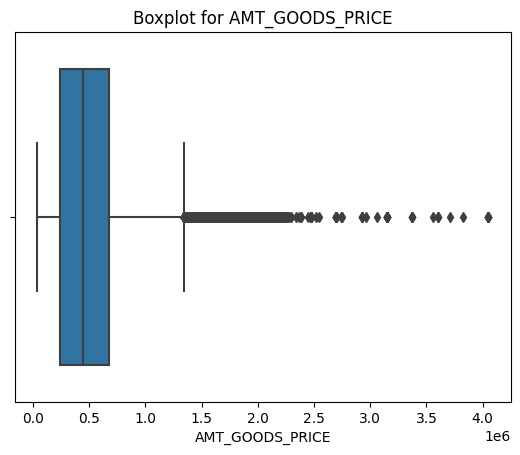

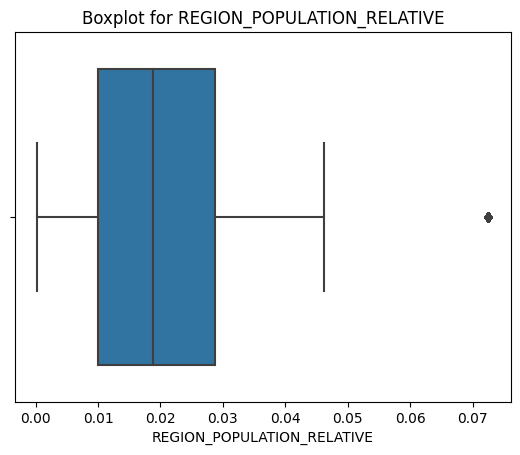

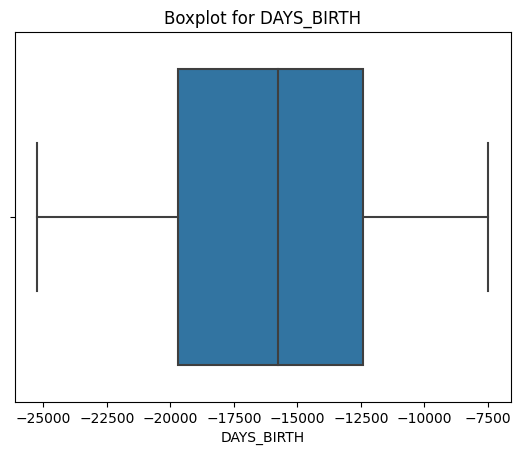

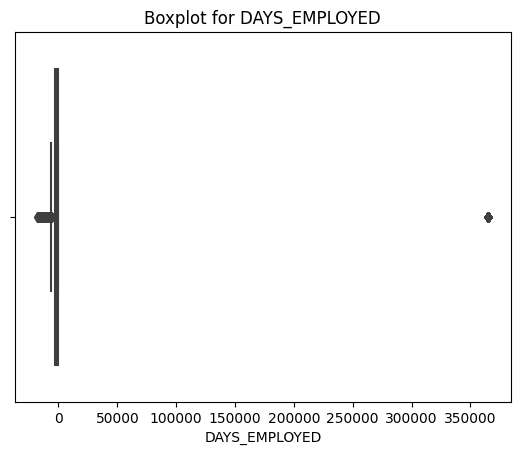

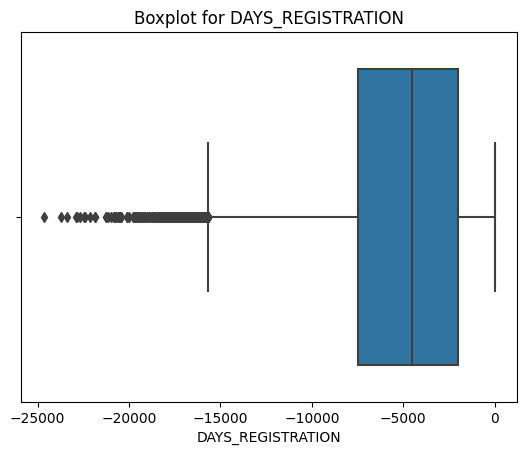

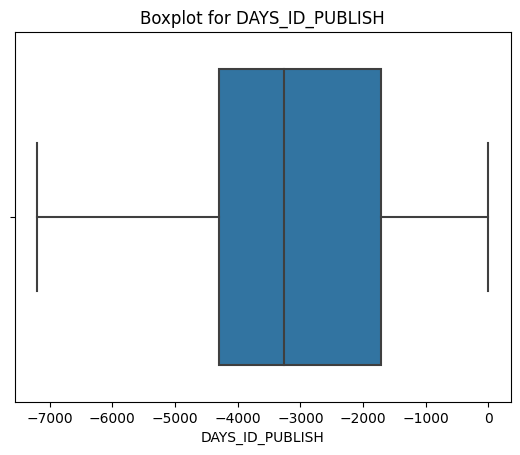

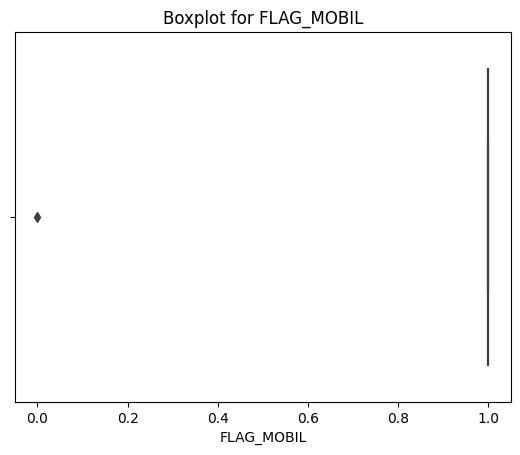

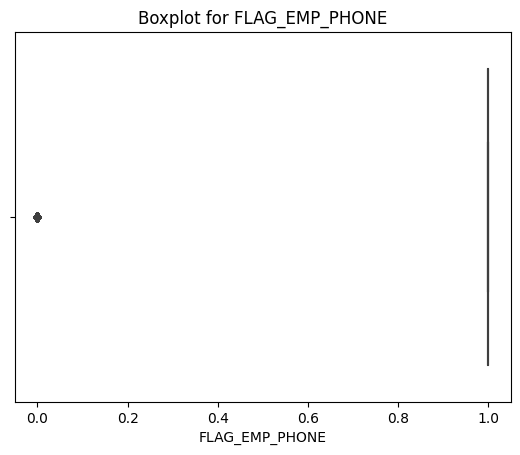

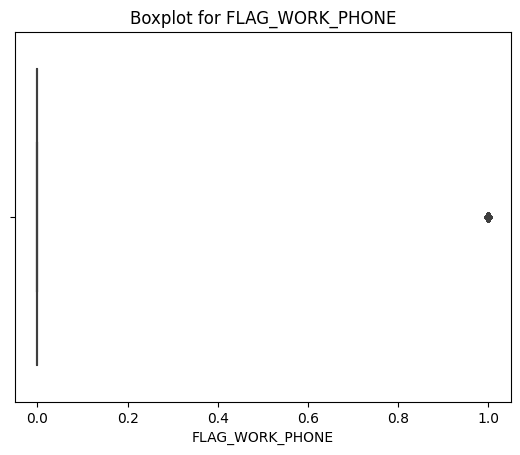

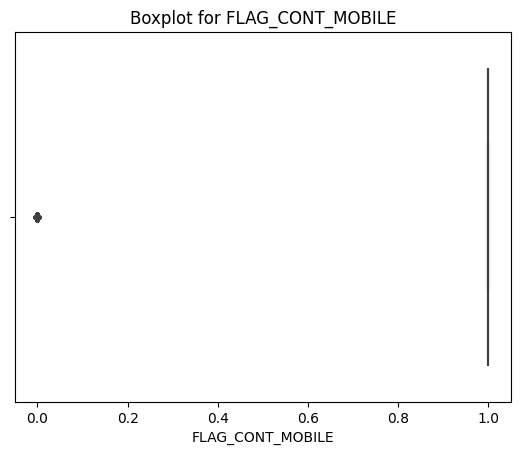

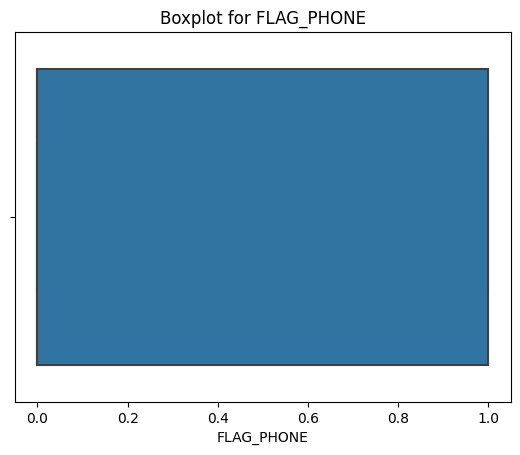

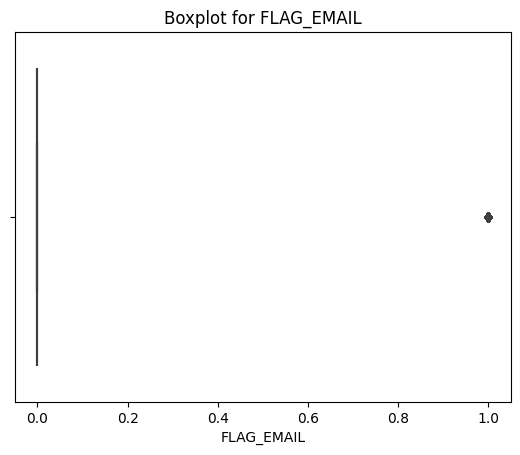

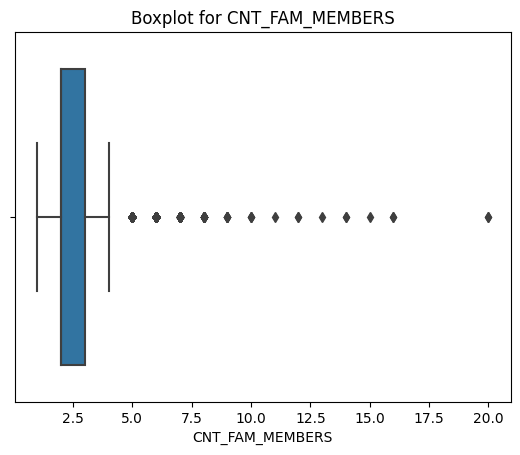

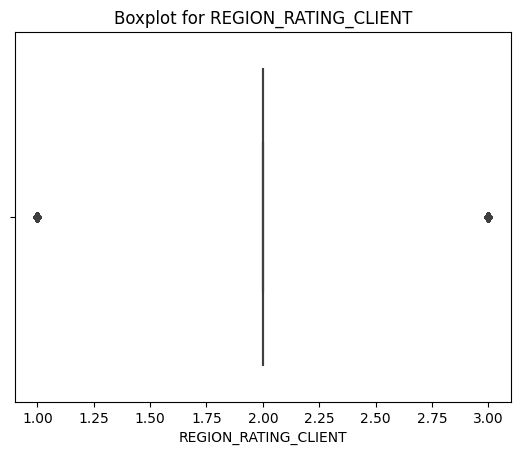

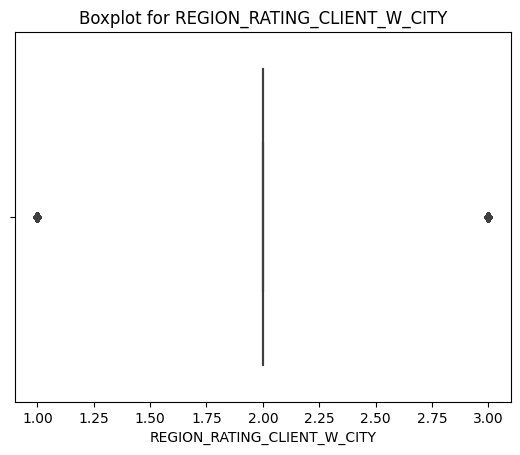

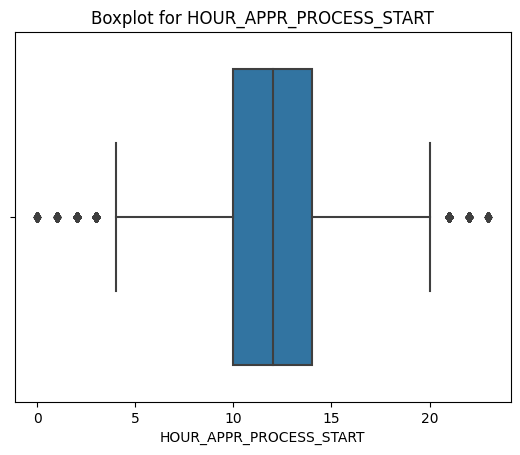

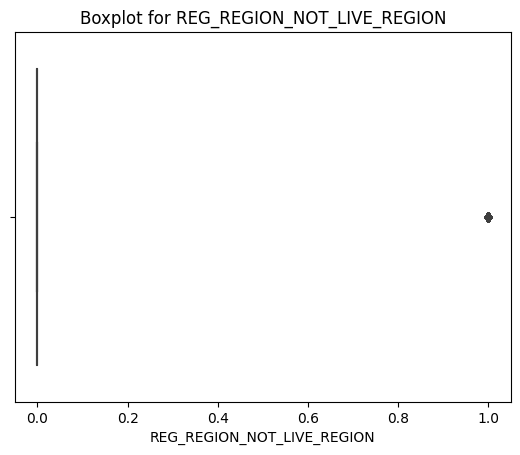

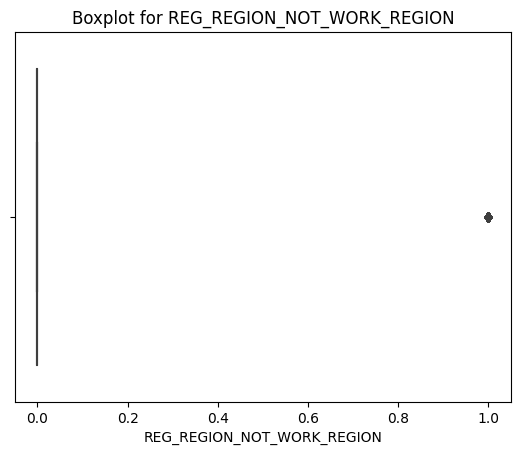

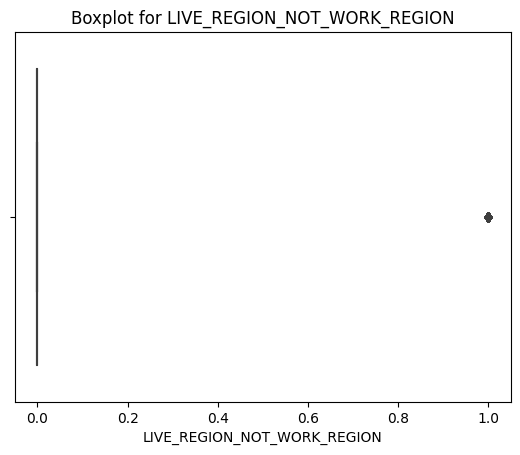

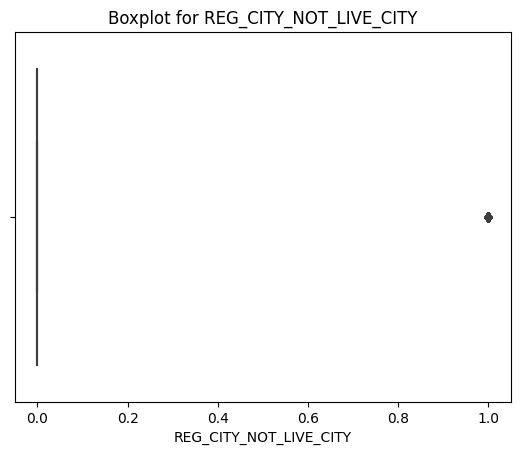

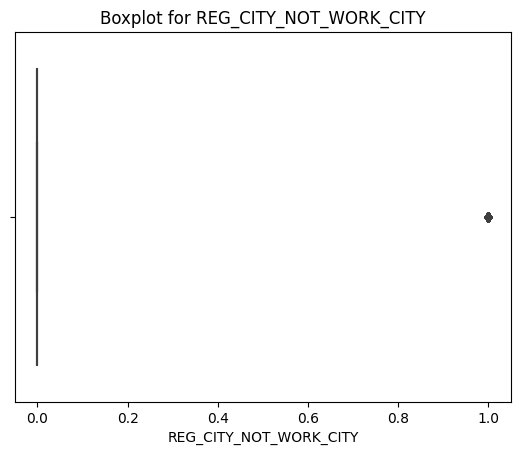

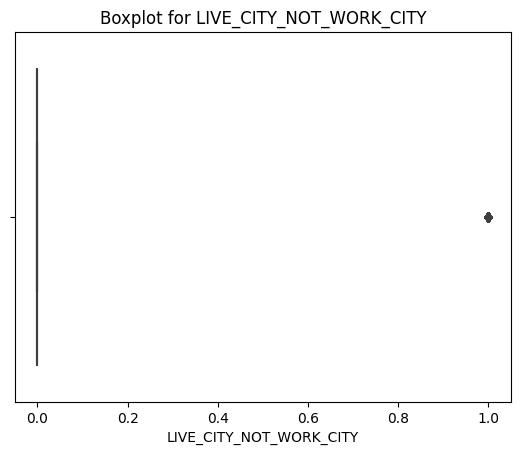

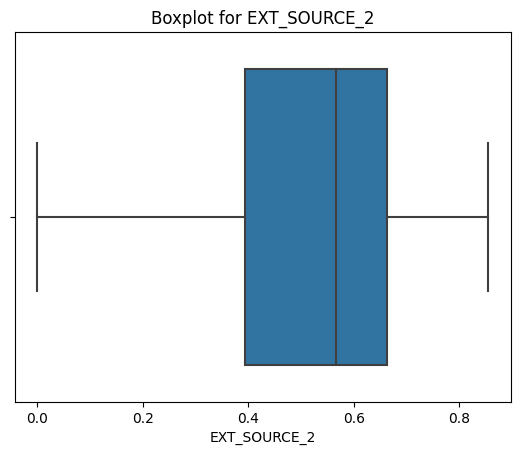

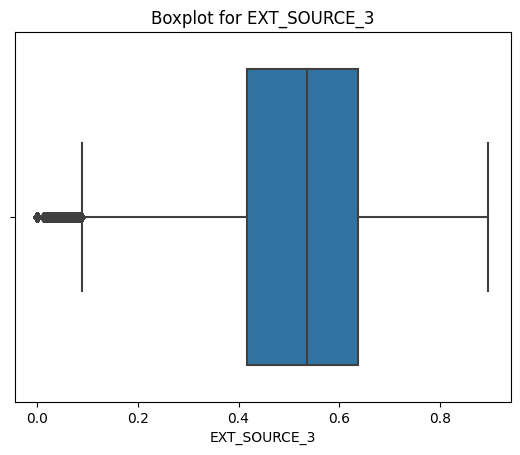

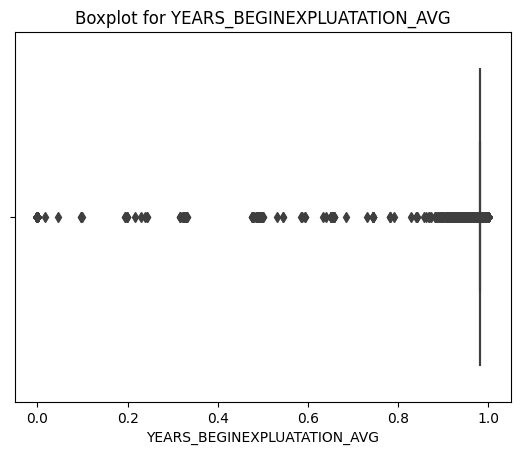

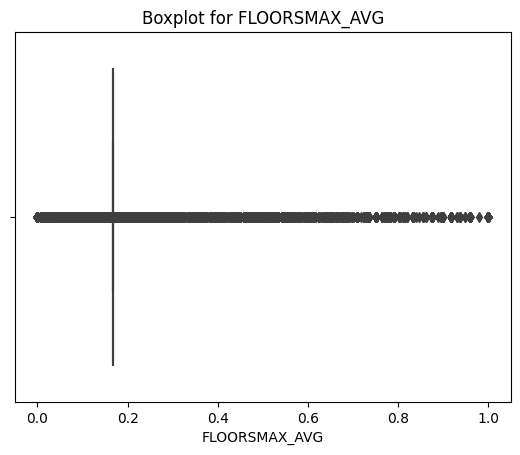

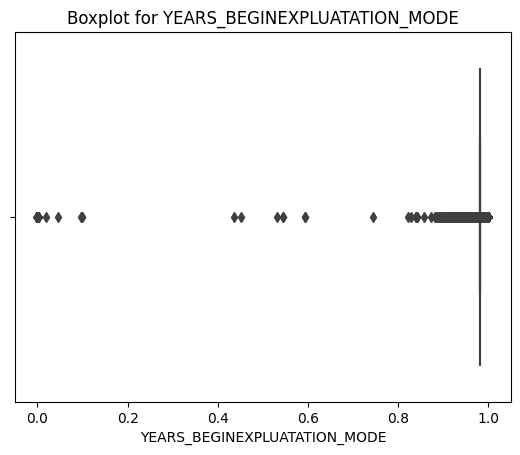

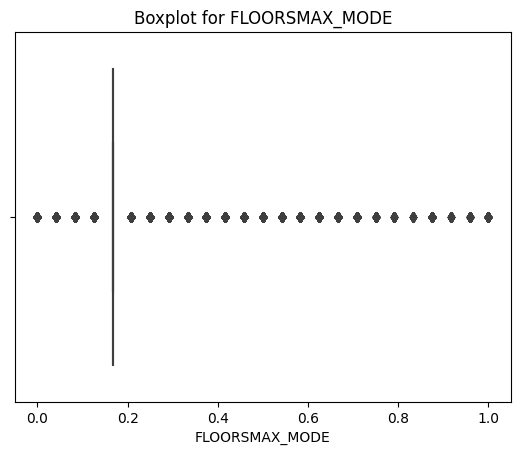

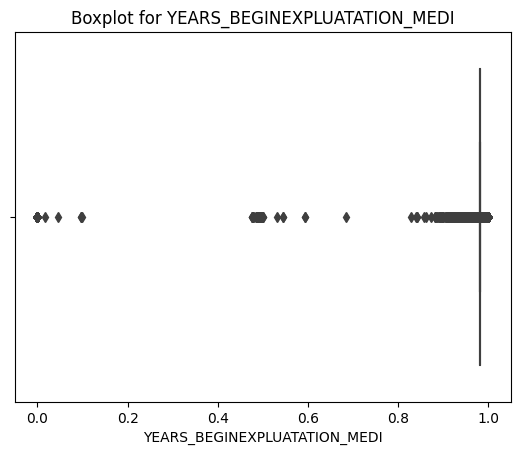

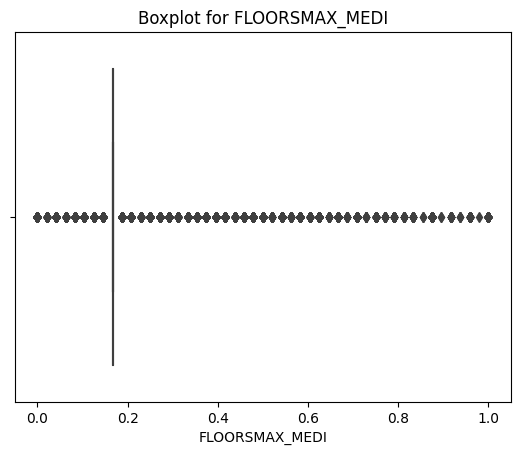

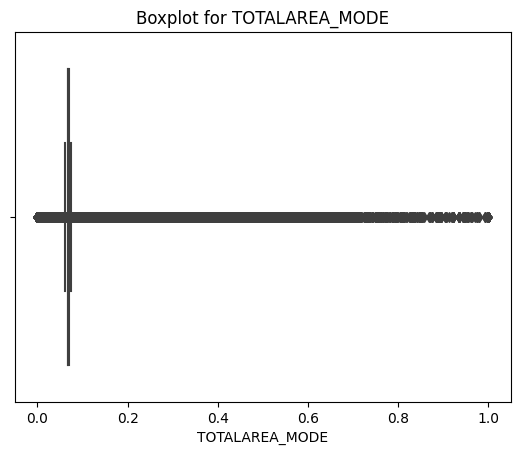

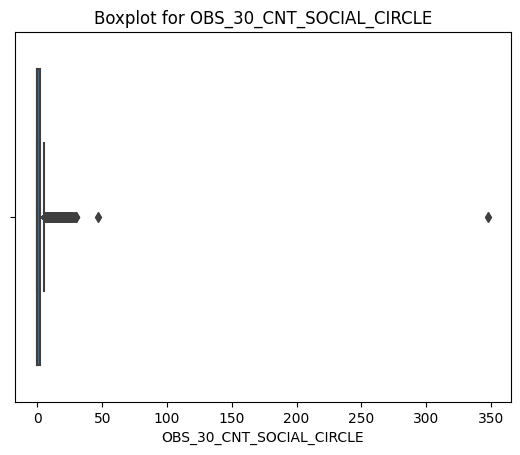

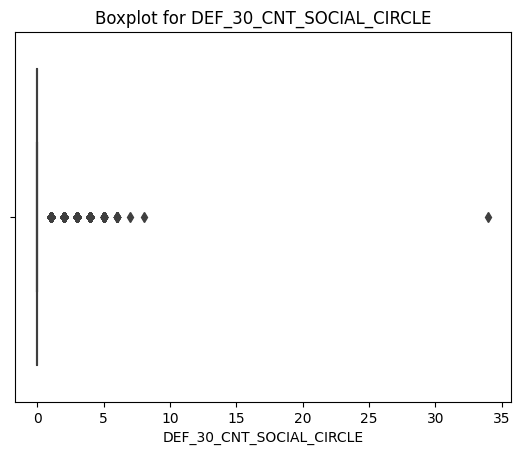

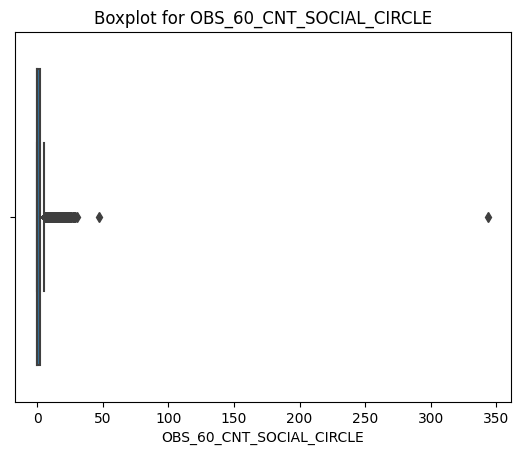

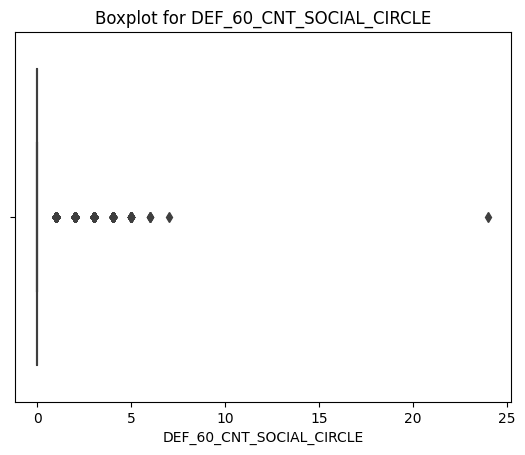

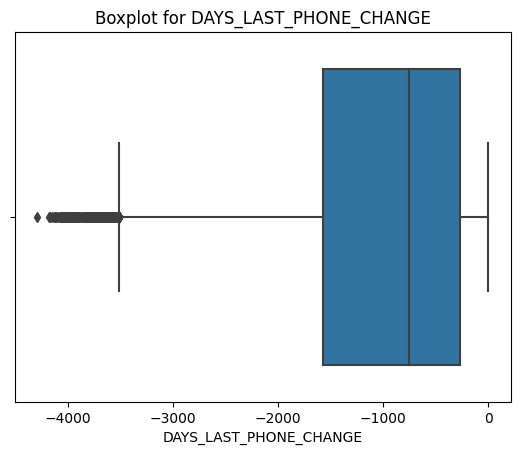

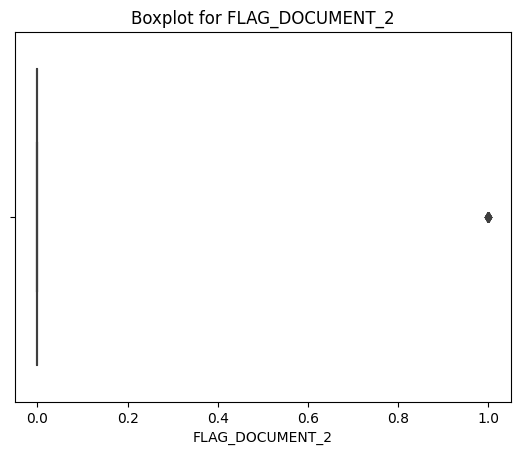

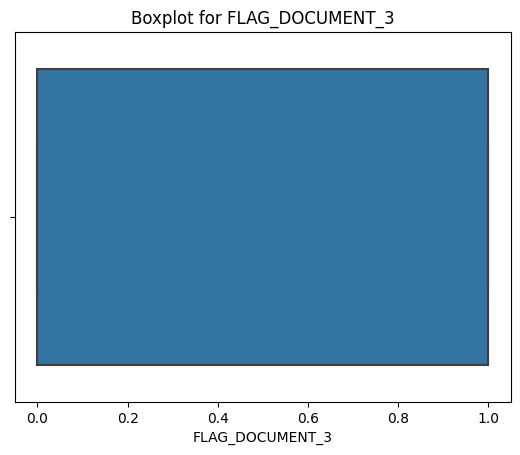

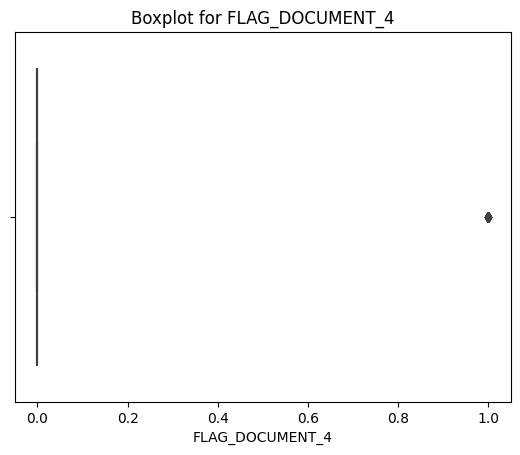

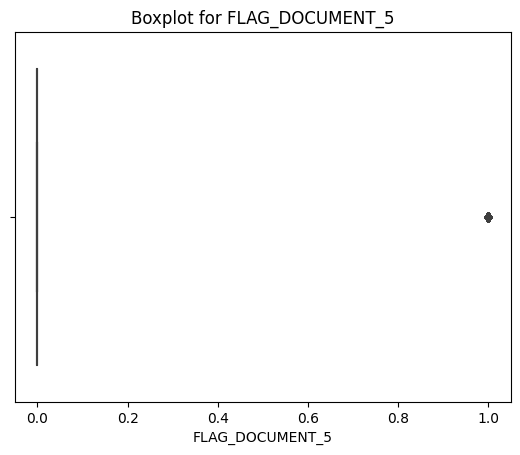

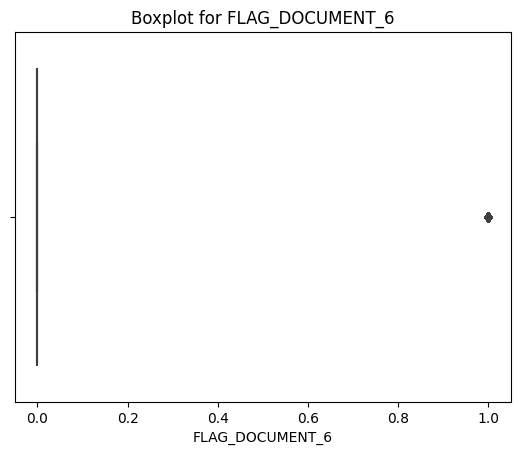

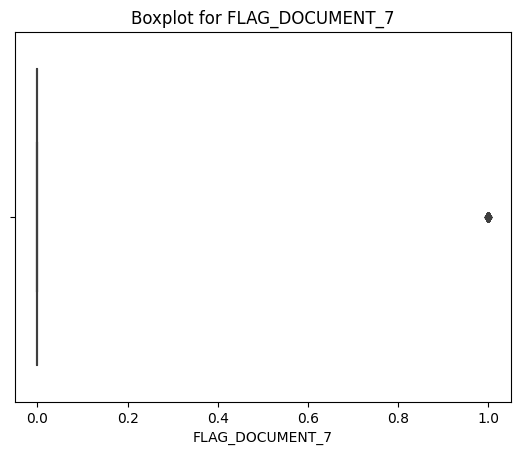

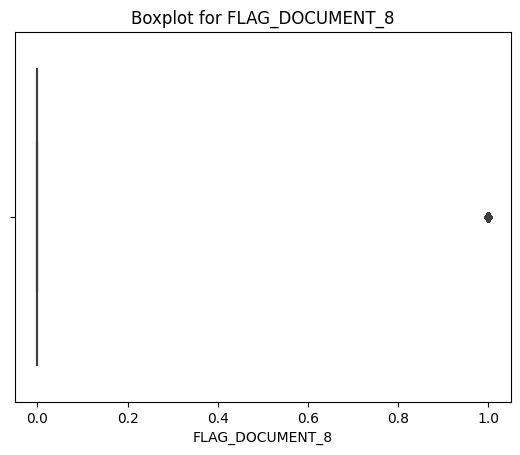

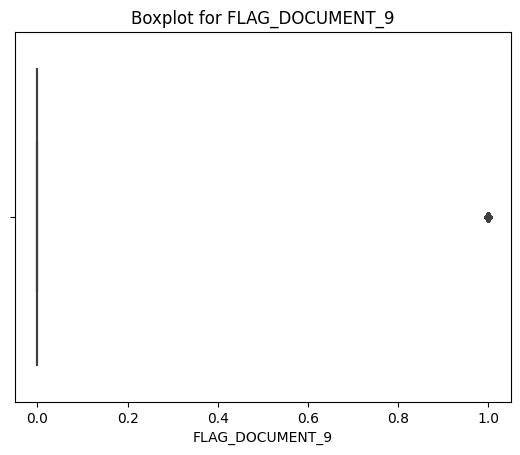

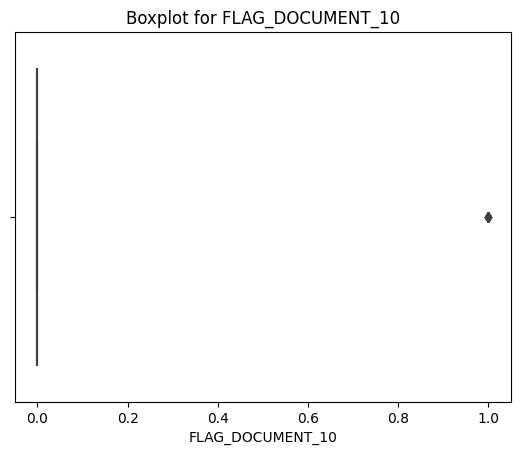

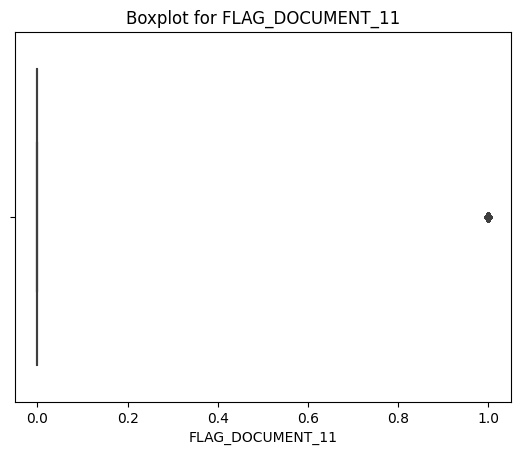

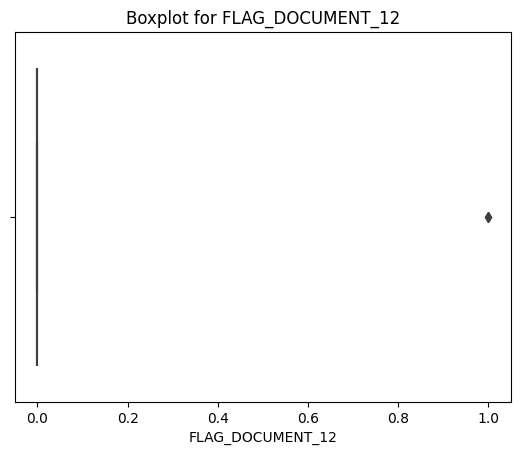

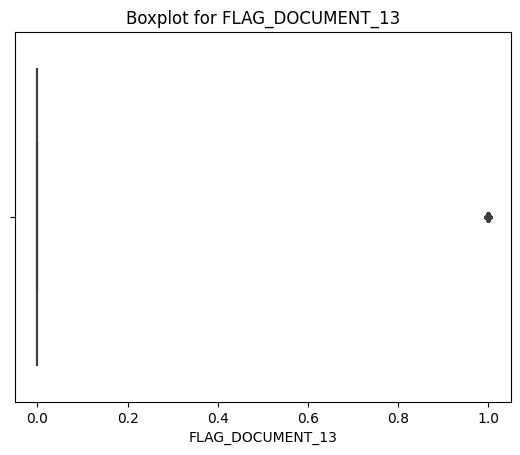

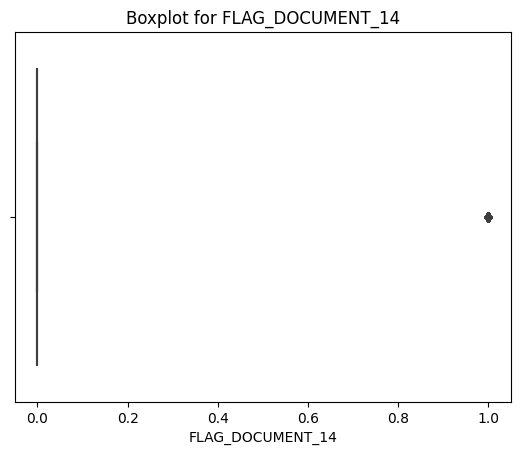

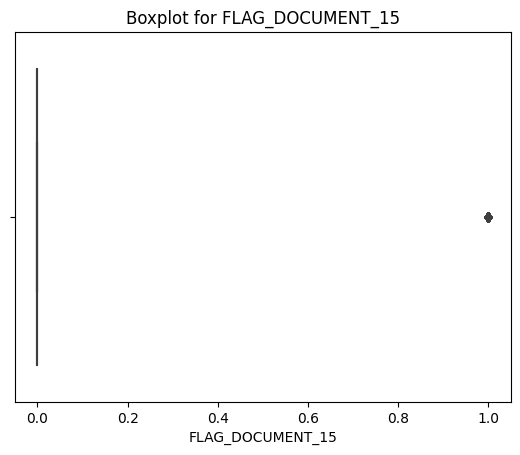

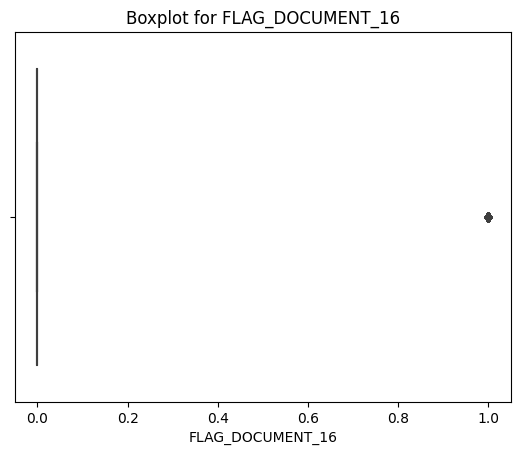

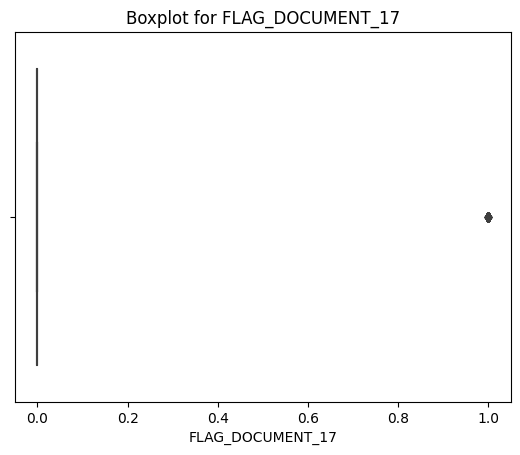

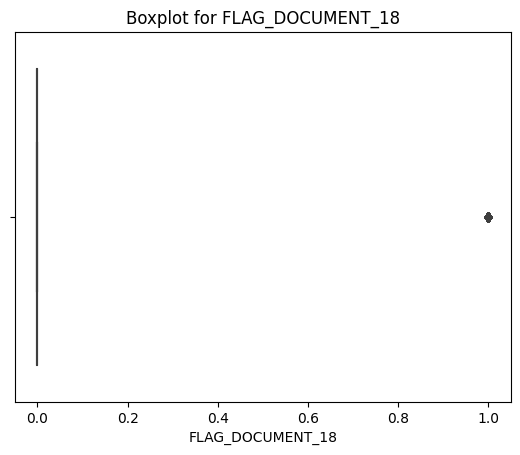

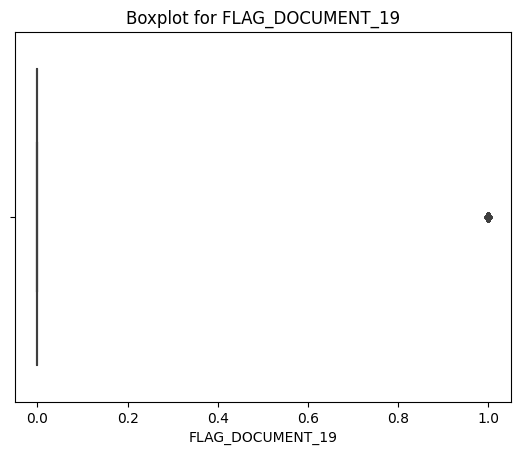

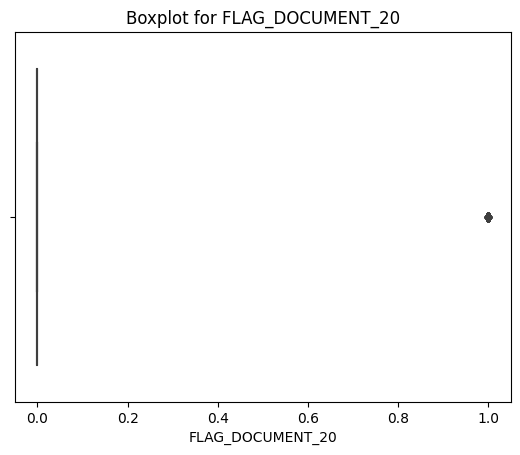

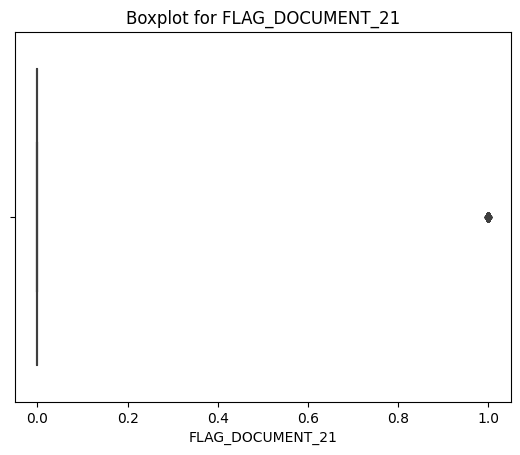

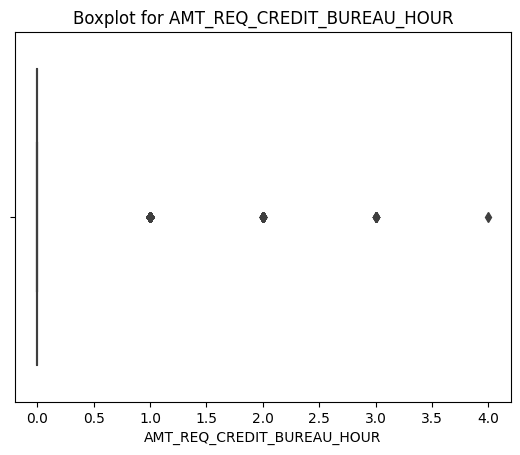

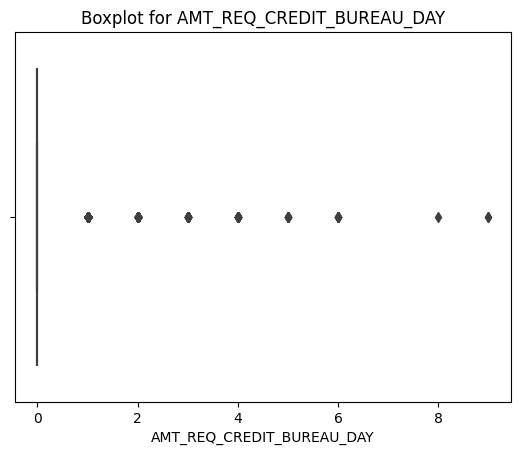

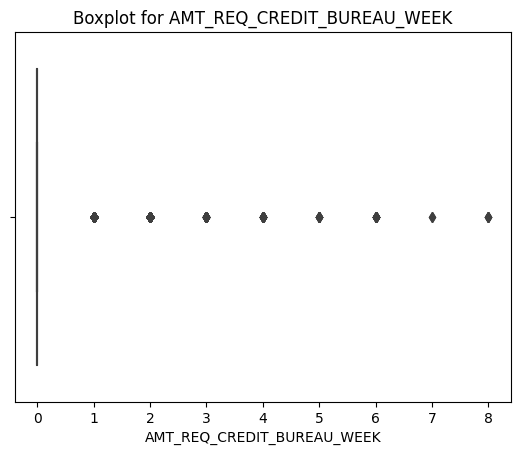

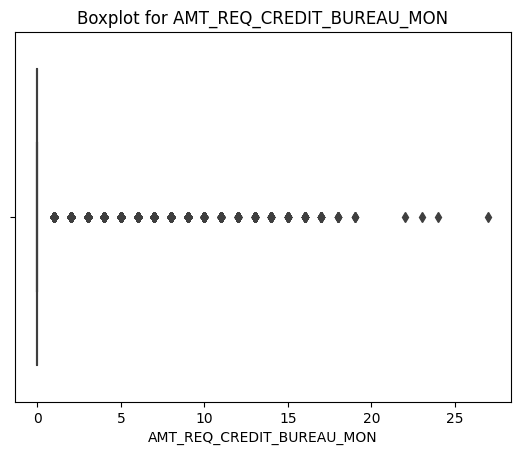

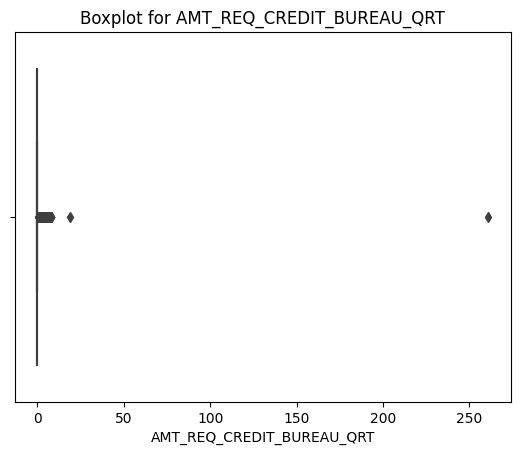

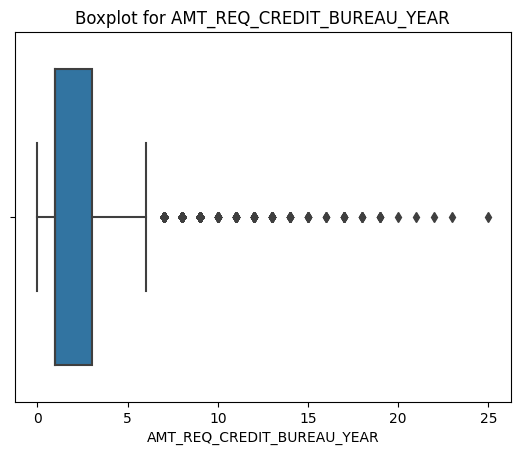

In [37]:
# Membuat boxplot untuk setiap kolom numerik
for column in df.select_dtypes(include='number').columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

# Feature Selection

In [38]:
# Mengubah nilai pada kolom target
df['TARGET'] = df['TARGET'].apply(lambda x : 1 if x==0 else 0)

In [39]:
# Memisahkan dependent dan independent variabel
x = df.drop("TARGET", axis=1)
y = df["TARGET"]

In [40]:
# Spliting the data into test and train sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42)

# x_train.shape, x_test.shape, y_train.shape, y_test.shape

## Numerical Column Selection

In [41]:
x_train_num = x_train.select_dtypes(exclude='object')
x_train_num.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE

In [42]:
F_statistic, p_values = f_classif(x_train_num, y_train)

#create dataframe
df_p = pd.DataFrame(data= {'Numerical Feature':x_train_num.columns.values,
                                'p-value': p_values.round(5)})

In [43]:
#filter only column that has p-value < 0.05
temp_num_cols = df_p[df_p['p-value']<0.05]['Numerical Feature'].tolist()

In [44]:
# Finding correlation between all the features and the target feature "BAD"
correlation_matrix = x_train[temp_num_cols].corr()
mask = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape, dtype = bool), k=1))
selected_col = [col for col in mask.columns if any (mask[col] < 0.7)]
selected_col

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLA

In [45]:
num_unique = x_train[selected_col].nunique()
df_num_unique= pd.DataFrame(data=num_unique).reset_index()
df_num_unique.rename(columns={0:'unique'}, inplace=True)
select_num_unique = df_num_unique[df_num_unique['unique']>2]
select_num_unique

,index,unique
0,AMT_INCOME_TOTAL,2185
1,AMT_CREDIT,5267
2,AMT_ANNUITY,13150
3,AMT_GOODS_PRICE,883
4,REGION_POPULATION_RELATIVE,81
5,DAYS_BIRTH,17418
6,DAYS_EMPLOYED,12078
7,DAYS_REGISTRATION,15367
8,DAYS_ID_PUBLISH,6140
12,CNT_FAM_MEMBERS,16


In [46]:
list_select_num_unique = select_num_unique['index'].tolist()

In [47]:
drop_value = ['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [48]:
filtered_list_num = [value for value in list_select_num_unique if value not in drop_value]
filtered_list_num

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE']

## Categorical Column Selection

In [49]:
# selected column
selected_cat_col = ['FLAG_OWN_CAR', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE']

In [50]:
# combine selected categorical & numerical column
selected_col = selected_cat_col + filtered_list_num

In [51]:
selected_col

['FLAG_OWN_CAR',
 'CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_INCOME_TYPE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE']

In [52]:
x_train = x_train[selected_col]
x_test = x_test[selected_col]

# Encoding

In [53]:
def create_dummy(df, col):
    dummy = pd.get_dummies(df[col], prefix_sep = ':')
    df = pd.concat([df, dummy], axis=1)
    return df

In [54]:
x_train = create_dummy(x_train, selected_cat_col)
x_test = create_dummy(x_test, selected_cat_col)

In [55]:
x_train.drop(selected_cat_col, axis=1, inplace=True)
x_test.drop(selected_cat_col, axis=1, inplace=True)

# Building Model

## Logistic Regression

In [56]:
logreg_basic = LogisticRegression()

# Training the basic logistic regression model with training set
logreg_basic.fit(x_train,y_train)

# Printing the coefficients
print("intercept ")
print(logreg_basic.intercept_)
print("")
print("coefficients ")
print(logreg_basic.coef_)

# Predicting the output of the test cases using the algorithm created above
y_predict = logreg_basic.predict(x_test)

# Validating the algorithm using various Performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("")
a1 = accuracy_score(y_test,y_predict)
f1 = f1_score(y_test, y_predict, average="macro")
p1 = precision_score(y_test, y_predict, average="macro")
r1 = recall_score(y_test, y_predict, average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)

intercept 
[1.16658976e-07]

coefficients 
[[ 1.71817399e-06  1.98155123e-07  4.97234429e-09 -9.25911969e-05
  -6.26245276e-07 -2.82194226e-05 -1.00985151e-04  4.75215390e-08
   2.68167069e-07  2.55606124e-07 -2.27974406e-04 -1.45720186e-08
   1.31230995e-07  2.77693675e-07 -1.61034699e-07  8.05785287e-10
   2.39356778e-07  3.28542188e-08 -1.17450376e-08 -1.44612768e-07
  -2.58267943e-08  1.34849599e-07 -1.29331955e-08  2.55166696e-08
   7.27647036e-12 -4.95457934e-09  4.57311503e-11  8.59319007e-08
  -8.63744169e-11  2.41302987e-09  6.16090880e-08  1.92428863e-10
  -5.21509133e-10 -3.29253190e-08]]

accuracy score :  0.9195323805342829
f1 score :  0.47903978586614937
precision score :  0.45976619026714144
recall score :  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[    0  4949]
 [    0 56554]]


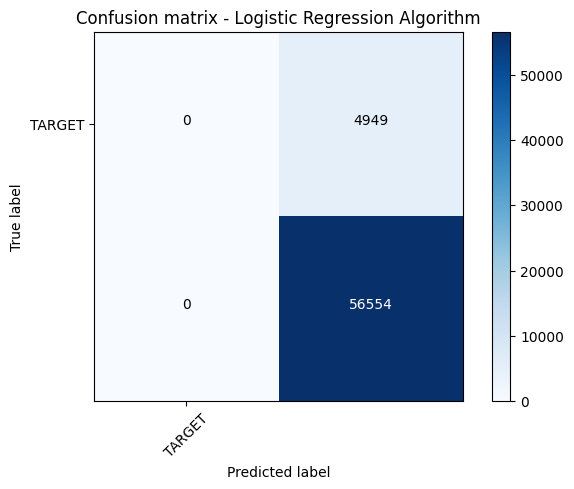

In [58]:
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["TARGET"],
                      title='Confusion matrix - Logistic Regression Algorithm')

plt.show()

## Decision Tree

accuracy score :  0.851161731948035
f1 score :  0.531884037365035
precision score :  0.5301095589855539
recall score :  0.5345464984844208
Confusion matrix, without normalization
[[  778  4171]
 [ 4983 51571]]


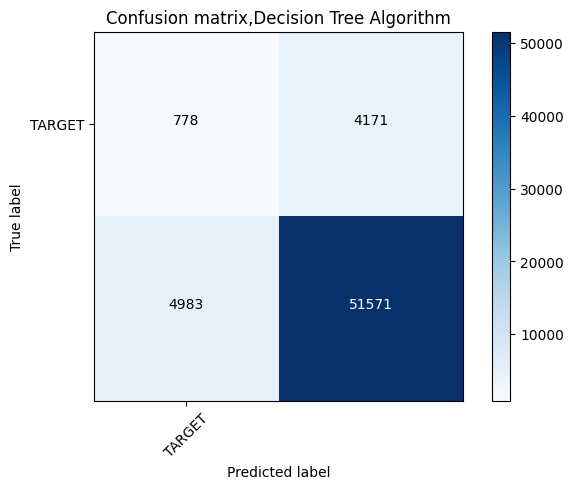

In [59]:
dectree_basic = DecisionTreeClassifier()
dectree_basic.max_depth = 100
# Training the basic Decision Tree model with training set
dectree_basic.fit(x_train,y_train)

# Predicting the output of the test cases using the algorithm created above
y_predict = dectree_basic.predict(x_test)

# Validating the algorithm using various Performance metrics

a2 = accuracy_score(y_test,y_predict)
f2 = f1_score(y_test, y_predict, average="macro")
p2 = precision_score(y_test, y_predict, average="macro")
r2 = recall_score(y_test, y_predict, average="macro")
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["TARGET"],title='Confusion matrix,Decision Tree Algorithm')

plt.show()

## Comparing The Model

In [60]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy Score': [a1,a2],
    'Recall Score' : [r1,r2],
    'F1 Score' : [f1,f2],
    'Precision Score' : [p1,p2]
})

In [61]:
pd.pivot_table(models,index = ["Model"])

,Accuracy Score,F1 Score,Precision Score,Recall Score
Model,,,,
Decision Tree,0.851162,0.531884,0.530110,0.534546
Logistic Regression,0.919532,0.479040,0.459766,0.500000


Recall metric in the testing dataset:  1.0
Accuracy score for the testing dataset:  0.9195323805342829
Confusion matrix, without normalization
[[    0  4949]
 [    0 56554]]

Recall metric in the testing dataset:  1.0
Accuracy score for the testing dataset:  0.9195323805342829
Confusion matrix, without normalization
[[    0  4949]
 [    0 56554]]

Recall metric in the testing dataset:  1.0
Accuracy score for the testing dataset:  0.9195323805342829
Confusion matrix, without normalization
[[    0  4949]
 [    0 56554]]

Recall metric in the testing dataset:  1.0
Accuracy score for the testing dataset:  0.9195323805342829
Confusion matrix, without normalization
[[    0  4949]
 [    0 56554]]

Recall metric in the testing dataset:  1.0
Accuracy score for the testing dataset:  0.9195323805342829
Confusion matrix, without normalization
[[    0  4949]
 [    0 56554]]

Recall metric in the testing dataset:  1.0
Accuracy score for the testing dataset:  0.9195323805342829
Confusion matrix, with

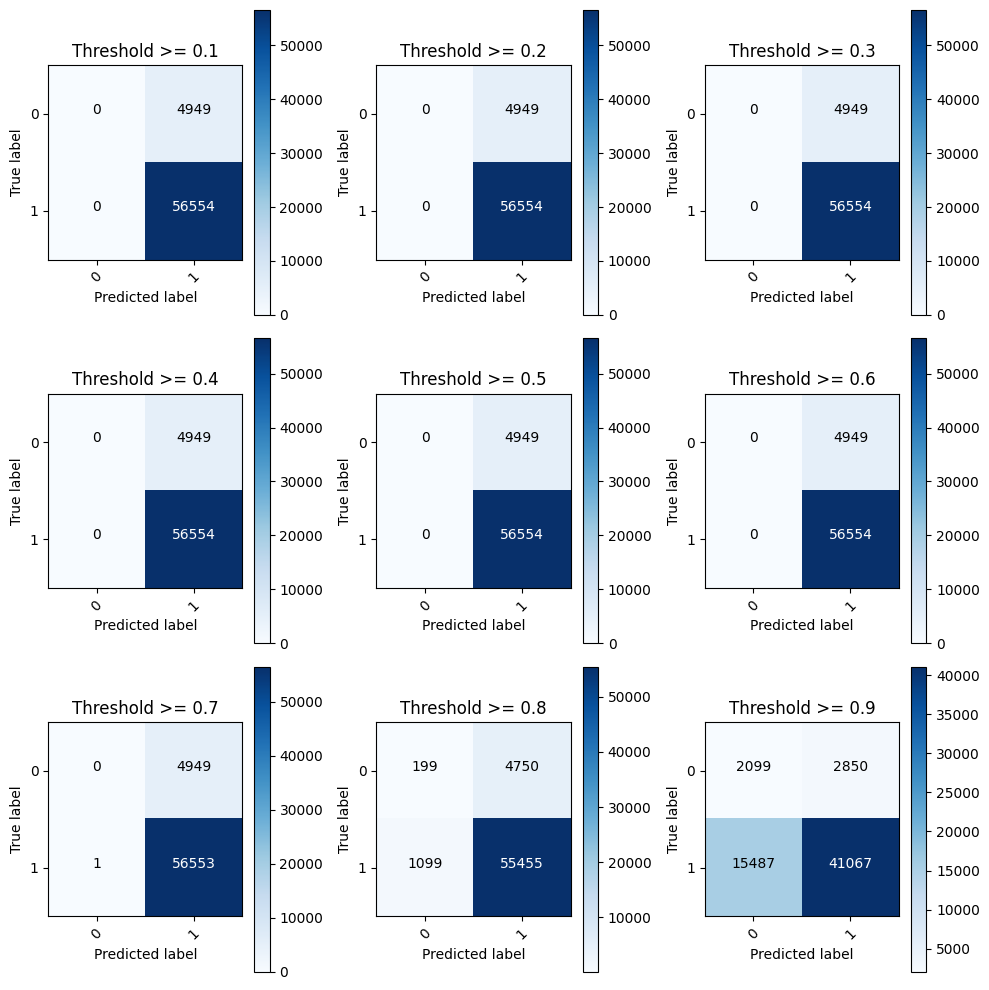

In [62]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_proba = lr.predict_proba(x_test)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] >= i

    plt.subplot(3,3,j)
    j += 1

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    rec1 = recall_score(y_test, y_test_predictions_high_recall)
    acc= 1.0*(cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[1,1]+cnf_matrix[0,1])
    print("Recall metric in the testing dataset: ",rec1)
    print("Accuracy score for the testing dataset: ",acc)
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)
    print("")